Nama: Clara Sista Widhiastuti </br>
NPM: 2206825782

# Regressi

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
import xgboost as xgb

In [ ]:
train = pd.read_csv("company_train.csv")
test = pd.read_csv("company_test_regress.csv")
train.head()

,ID,company_name,status_label,year,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,retained_earnings,total_liabilities,total_operating_expenses,current_ratio,net_profit_margin_category
0,CQZW3V9G,C_1,alive,1999,833.107,18.373,89.031,336.018,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,201.026,401.483,935.302,3.12,Low Profit Margin
1,CIRJ6YT8,C_1,alive,2000,713.811,18.577,64.367,320.590,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,204.065,361.642,809.888,3.87,Low Profit Margin
2,CAHLFH0N,C_1,alive,2001,526.477,22.496,27.207,286.588,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,139.603,399.964,611.514,2.90,Low Profit Margin
3,CBU4UE1T,C_1,alive,2002,496.747,27.172,30.745,259.954,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,124.106,391.633,575.592,1.95,Low Profit Margin
4,C0DQ4A9M,C_1,alive,2003,523.302,26.680,47.491,247.245,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.884,407.608,604.467,3.29,Low Profit Margin


## Coba 1

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62896 entries, 0 to 62895
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             62896 non-null  object 
 1   company_name                   62896 non-null  object 
 2   status_label                   62896 non-null  object 
 3   year                           62896 non-null  int64  
 4   cost_of_goods_sold             62896 non-null  float64
 5   depreciation_and_amortization  62896 non-null  float64
 6   ebitda                         62896 non-null  float64
 7   inventory                      62896 non-null  float64
 8   total_receivables              62896 non-null  float64
 9   market_value                   62896 non-null  float64
 10  net_sales                      62896 non-null  float64
 11  total_assets                   62896 non-null  float64
 12  total_long_term_debt           62896 non-null 

In [ ]:
train.isna().sum()

,0
ID,0
company_name,0
status_label,0
year,0
cost_of_goods_sold,0
depreciation_and_amortization,0
ebitda,0
inventory,0
total_receivables,0
market_value,0


In [ ]:
train.duplicated().sum()

0

In [ ]:
df = train.copy()
df.head()

,ID,company_name,status_label,year,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,retained_earnings,total_liabilities,total_operating_expenses,current_ratio,net_profit_margin_category
0,CQZW3V9G,C_1,alive,1999,833.107,18.373,89.031,336.018,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,201.026,401.483,935.302,3.12,Low Profit Margin
1,CIRJ6YT8,C_1,alive,2000,713.811,18.577,64.367,320.590,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,204.065,361.642,809.888,3.87,Low Profit Margin
2,CAHLFH0N,C_1,alive,2001,526.477,22.496,27.207,286.588,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,139.603,399.964,611.514,2.90,Low Profit Margin
3,CBU4UE1T,C_1,alive,2002,496.747,27.172,30.745,259.954,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,124.106,391.633,575.592,1.95,Low Profit Margin
4,C0DQ4A9M,C_1,alive,2003,523.302,26.680,47.491,247.245,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.884,407.608,604.467,3.29,Low Profit Margin


In [ ]:
df_test = test.copy()

In [ ]:
def check_outlier(df):
  Q3 = df.select_dtypes(include='number').quantile(0.75)
  Q1 = df.select_dtypes(include='number').quantile(0.25)
  IQR = Q3 - Q1

  Jumlah_Outlier = []

  for col in df.select_dtypes(np.number).columns:
      outliers = ((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
      Jumlah_Outlier.append([col, outliers, outliers/len(df)])

  indexOutput = list(range(0, len(Jumlah_Outlier)))

  return pd.DataFrame(Jumlah_Outlier, columns=['Column', 'Outlier','persentase'],index=indexOutput).sort_values(by=['persentase'], ascending = False,ignore_index=True)

In [ ]:
check_outlier(df)

,Column,Outlier,persentase
0,retained_earnings,14045,0.223305
1,ebit,10419,0.165654
2,total_long_term_debt,10158,0.161505
3,inventory,9915,0.157641
4,total_liabilities,9803,0.155860
5,ebitda,9606,0.152728
6,cost_of_goods_sold,9351,0.148674
7,total_assets,9335,0.148420
8,market_value,9109,0.144826
9,net_sales,9077,0.144318


### penanganan outlier
ini outliernya mau ditangani tapi malah jelek di kagglenya bingung....ASGDAHDGASHDJ

In [ ]:
outlier_columns = ['retained_earnings','ebit', 'total_long_term_debt', 'inventory', 'total_liabilities',
                   'ebitda', 'cost_of_goods_sold', 'total_assets', 'market_value',
                   'net_sales', 'depreciation_and_amortization', 'total_operating_expenses',
                   'gross_profit', 'total_receivables']

# # Calculate the lower and upper bounds for outliers (1st and 99th percentiles) for each column
# lower_bound = df[outlier_columns].quantile(0.01)
# upper_bound = df[outlier_columns].quantile(0.99)

# # Clip the outliers for each of the outlier columns individually
# for column in outlier_columns:
#     df[column] = np.clip(df[column], lower_bound[column], upper_bound[column])

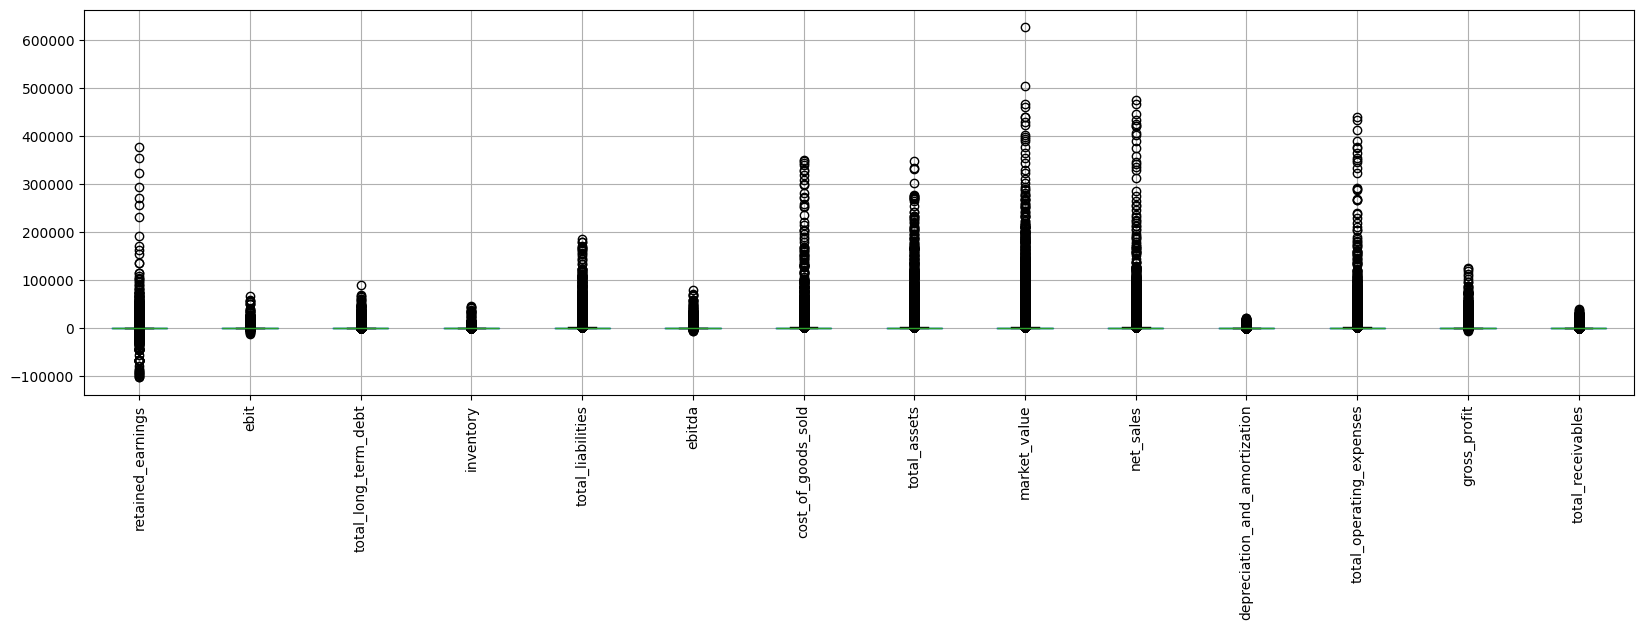

In [ ]:
import matplotlib.pyplot as plt
df[outlier_columns].boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Q1 = df[outlier_columns].quantile(0.10)
# Q3 = df[outlier_columns].quantile(0.90)
# IQR = Q3 - Q1

# def cap_outliers(df, column, lower_percentile=0.10, upper_percentile=0.90):
#     lower_cap = df[column].quantile(lower_percentile)
#     upper_cap = df[column].quantile(upper_percentile)
#     df[column] = df[column].clip(lower_cap, upper_cap)
#     return df

# for col in outlier_columns:
#     df = cap_outliers(df, col)
#     np.log1p(df[col])

### encoding

In [ ]:
df = pd.get_dummies(df, columns=['status_label'], drop_first=False)
df_test = pd.get_dummies(df_test, columns=['status_label'], drop_first=False)

In [ ]:
missing_cols = set(df.columns) - set(df_test.columns)
for col in missing_cols:
    if col != "retained_earnings":
        df_test[col] = 0

In [ ]:
for col in df.columns:
    if df[col].dtype == bool:
        df[col] = df[col].astype(int)
for col in df_test.columns:
    if df_test[col].dtype == bool:
        df_test[col] = df_test[col].astype(int)

In [ ]:
net_profit_margin_category_mapping = {
    'Low Profit Margin': 0,
    'High Profit Margin': 1,
    'Healthy Profit Margin': 2
}
df['net_profit_margin_category'] = df['net_profit_margin_category'].map(net_profit_margin_category_mapping)


In [ ]:
le = LabelEncoder()
df['company_name']=le.fit_transform(df['company_name'])
df_test['company_name']=le.fit_transform(df_test['company_name'])

### processing

In [ ]:
X = df.drop(columns=['ID', 'retained_earnings'])
y = df['retained_earnings']

In [ ]:
selector = SelectKBest(f_classif, k=12)  # Adjust k to match common features
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
X_test = df_test[selected_features]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_regressor.fit(X_train_scaled, y_train)

# Validation predictions
y_val_pred_xgb = xgb_regressor.predict(X_val_scaled)

# Metrics
mae_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
mse_xgb = mean_squared_error(y_val, y_val_pred_xgb)
r2_xgb = r2_score(y_val, y_val_pred_xgb)

print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("R^2 Score:", r2_xgb)

MAE: 419.6941489441686
MSE: 6789169.56018823
R^2 Score: 0.7077205770460561


In [ ]:
y_test_pred_xgb = xgb_regressor.predict(X_test_scaled)

# Create submission file
submission = pd.DataFrame({
    'ID': df_test['ID'],  # Use the ID column from the test dataset
    'retained_earnings': y_test_pred_xgb  # Predictions for retained_earnings
})

submission.to_csv('xgb.csv', index=False)

Penjelasan Parameter
objective='reg:squarederror': Untuk regresi dengan error kuadrat.
n_estimators=100: Jumlah pohon yang akan dibangun (hyperparameter tuning bisa menyesuaikan ini).
learning_rate=0.1: Ukuran langkah dalam pembaruan bobot setiap iterasi.
max_depth=6: Kedalaman maksimum setiap pohon (untuk menangani overfitting).

In [ ]:
# ridge = Ridge(alpha=6)
# ridge.fit(X_train_scaled, y_train)

In [ ]:
# y_val_pred_ridge = ridge.predict(X_val_scaled)
# mae_ridge = mean_absolute_error(y_val, y_val_pred_ridge)
# mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)
# r2_ridge = r2_score(y_val, y_val_pred_ridge)

# mae_ridge, mse_ridge, r2_ridge

### coba processing cara 2

In [ ]:
X = df.drop(columns=['ID', 'retained_earnings'])
y = df['retained_earnings']
test_ids = df['ID']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_regressor.fit(X_train_scaled, y_train)

# Validation predictions
y_test_pred_xgb = xgb_regressor.predict(X_test_scaled)

# Metrics
mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
r2_xgb = r2_score(y_test, y_test_pred_xgb)

print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("R^2 Score:", r2_xgb)

MAE: 380.2381438788467
MSE: 7374632.6767602265
R^2 Score: 0.6825159006338004


In [ ]:

# Create submission file
submission = pd.DataFrame({
    'ID': test_ids[X_test.index],  # Use the ID column from the test dataset
    'retained_earnings': y_test_pred_xgb  # Predictions for retained_earnings
})

submission.to_csv('kaggle_submission_xgb.csv', index=False)

## coba 2

In [ ]:
# List of positively skewed features (based on your outlier analysis)
# skewed_features = [
#     'retained_earnings', 'ebit', 'total_long_term_debt', 'inventory',
#     'total_liabilities', 'ebitda', 'cost_of_goods_sold', 'total_assets',
#     'market_value', 'net_sales', 'depreciation_and_amortization',
#     'total_operating_expenses', 'gross_profit', 'total_receivables', 'current_ratio'
# ]
# def cap_outliers(df, column, threshold=1.5):
#     # Calculate the median and IQR
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     # Define the outlier threshold
#     lower_bound = Q1 - threshold * IQR
#     upper_bound = Q3 + threshold * IQR
#     # Replace outliers with the median
#     mean = df[column].mean()
#     df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), mean, df[column])

# for feature in skewed_features:
#     cap_outliers(train, feature)

# for feature in skewed_features:
#     train[feature] = np.log1p(train[feature])

# lower_limit = train[skewed_features].quantile(0.02)
# upper_limit = train[skewed_features].quantile(0.98)
# train[skewed_features] = train[skewed_features].apply(
#     lambda x: x.clip(lower=lower_limit[x.name], upper=upper_limit[x.name])
# )


In [ ]:
train.isna().sum()

,0
ID,0
company_name,0
status_label,0
year,0
cost_of_goods_sold,0
depreciation_and_amortization,0
ebitda,0
inventory,0
total_receivables,0
market_value,0


In [ ]:
id= train['ID']
train = train.drop(columns=['net_profit_margin_category'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.linear_model import Ridge

# Assuming your data is loaded into 'train_data_cleaned'
X = train.drop(columns=['ID', 'retained_earnings'])  # Features (excluding target)
y = train['retained_earnings']  # Target (retained earnings)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Specify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a pipeline for preprocessing and model training
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='drop'
)

# Define the model pipeline (using Lasso Regression)
# alpha parameter controls the strength of regularization
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=2.0, random_state=42))  # You can adjust alpha value
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on validation data
y_val_pred = pipeline.predict(X_val)

# Calculate performance metrics
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Optionally, predict on test data
test['retained_earnings'] = pipeline.predict(test.drop(columns=['ID']))

# Display test data results (predictions)
print(test[['ID', 'retained_earnings']].head())


In [ ]:
submission = pd.DataFrame({
    'ID': test['ID'],  # Keep the ID from the test data
    'retained_earnings': test['retained_earnings']  # Predictions for retained_earnings
})

# Save the DataFrame to a CSV file for Kaggle submission
submission.to_csv('kaggle_submission.csv', index=False)

In [ ]:
submission.head()

In [ ]:
train.head()

# klasifikasi

In [ ]:
!pip install lightgbm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay)
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.preprocessing import RobustScaler

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
train = pd.read_csv("company_train.csv")
test = pd.read_csv("company_test_classif.csv")
train.head()

,ID,company_name,status_label,year,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,retained_earnings,total_liabilities,total_operating_expenses,current_ratio,net_profit_margin_category
0,CQZW3V9G,C_1,alive,1999,833.107,18.373,89.031,336.018,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,201.026,401.483,935.302,3.12,Low Profit Margin
1,CIRJ6YT8,C_1,alive,2000,713.811,18.577,64.367,320.590,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,204.065,361.642,809.888,3.87,Low Profit Margin
2,CAHLFH0N,C_1,alive,2001,526.477,22.496,27.207,286.588,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,139.603,399.964,611.514,2.90,Low Profit Margin
3,CBU4UE1T,C_1,alive,2002,496.747,27.172,30.745,259.954,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,124.106,391.633,575.592,1.95,Low Profit Margin
4,C0DQ4A9M,C_1,alive,2003,523.302,26.680,47.491,247.245,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.884,407.608,604.467,3.29,Low Profit Margin


## preprocessing

In [ ]:
train.isnull().sum()

,0
ID,0
company_name,0
status_label,0
year,0
cost_of_goods_sold,0
depreciation_and_amortization,0
ebitda,0
inventory,0
total_receivables,0
market_value,0


In [ ]:
train.duplicated().sum()

0

In [ ]:
def check_outlier(df):
  Q3 = df.select_dtypes(include='number').quantile(0.75)
  Q1 = df.select_dtypes(include='number').quantile(0.25)
  IQR = Q3 - Q1

  Jumlah_Outlier = []

  for col in df.select_dtypes(np.number).columns:
      outliers = ((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
      Jumlah_Outlier.append([col, outliers, outliers/len(df)])

  indexOutput = list(range(0, len(Jumlah_Outlier)))

  return pd.DataFrame(Jumlah_Outlier, columns=['Column', 'Outlier','persentase'],index=indexOutput).sort_values(by=['persentase'], ascending = False,ignore_index=True)

In [ ]:
check_outlier(train)

,Column,Outlier,persentase
0,retained_earnings,14045,0.223305
1,ebit,10419,0.165654
2,total_long_term_debt,10158,0.161505
3,inventory,9915,0.157641
4,total_liabilities,9803,0.155860
5,ebitda,9606,0.152728
6,cost_of_goods_sold,9351,0.148674
7,total_assets,9335,0.148420
8,market_value,9109,0.144826
9,net_sales,9077,0.144318


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numerical_attributes = train.select_dtypes(include='number').columns
train[numerical_attributes]= scaler.fit_transform(train[numerical_attributes])

In [ ]:
train = pd.get_dummies(train, columns=['status_label'], drop_first=False)
test = pd.get_dummies(test, columns=['status_label'], drop_first=False)

In [ ]:
train.head()

,ID,company_name,year,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,total_receivables,market_value,net_sales,...,total_long_term_debt,ebit,gross_profit,retained_earnings,total_liabilities,total_operating_expenses,current_ratio,net_profit_margin_category,status_label_alive,status_label_failed
0,CQZW3V9G,C_1,-0.857143,1.423249,0.296279,0.656024,5.146713,1.017785,0.190039,1.015085,...,0.925010,0.857285,0.488961,1.107381,0.687908,1.115315,0.593137,Low Profit Margin,True,False
1,CIRJ6YT8,C_1,-0.714286,1.193830,0.301579,0.442549,4.905609,0.893758,0.194587,0.838135,...,0.922574,0.528410,0.378260,1.124075,0.605525,0.937943,0.960784,Low Profit Margin,True,False
2,CAHLFH0N,C_1,-0.571429,0.833568,0.403382,0.120919,4.374236,0.538865,0.181540,0.560426,...,1.122306,-0.014851,0.204918,0.769965,0.684767,0.657385,0.485294,Low Profit Margin,True,False
3,CBU4UE1T,C_1,-0.428571,0.776394,0.524850,0.151541,3.958008,0.433261,-0.048937,0.522244,...,0.841388,-0.029901,0.195373,0.684835,0.667540,0.606581,0.019608,Low Profit Margin,True,False
4,C0DQ4A9M,C_1,-0.285714,0.827462,0.512070,0.296483,3.759396,0.794562,0.123536,0.576033,...,1.286315,0.198068,0.263940,0.727562,0.700573,0.647418,0.676471,Low Profit Margin,True,False


## processing

In [ ]:
X = train.drop(['net_profit_margin_category', 'ID', 'company_name', 'retained_earnings'], axis=1)
y = train['net_profit_margin_category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
def evaluate_classifier_performance(classifier, prediction, X_test, y_test):
    print("Hasil Evaluasi:\n\n%s\n" % classification_report(y_test, prediction))
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro'))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro'))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro'))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro'))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print("\nConfusion Matrix\n")
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, values_format='d')

In [ ]:
# Train MLP Classifier
mlp_classifier = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(3, 3),
    random_state=42
)
mlp_classifier.fit(X_train_resampled, y_train_resampled)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=25367,
              solver='lbfgs')

Hasil Evaluasi:

                       precision    recall  f1-score   support

Healthy Profit Margin       0.36      0.12      0.18      2015
   High Profit Margin       0.46      0.82      0.59      2111
    Low Profit Margin       0.94      0.91      0.92      8454

             accuracy                           0.76     12580
            macro avg       0.59      0.61      0.56     12580
         weighted avg       0.77      0.76      0.75     12580


Accuracy: 0.764785373608903
Precision Macro Average: 0.5856910940578907
Precision Micro Average: 0.764785373608903
Recall Macro Average: 0.6133389893436133
Recall Micro Average: 0.764785373608903
F1 Macro Average: 0.5621943863364002
F1 Micro Average: 0.764785373608903

Confusion Matrix



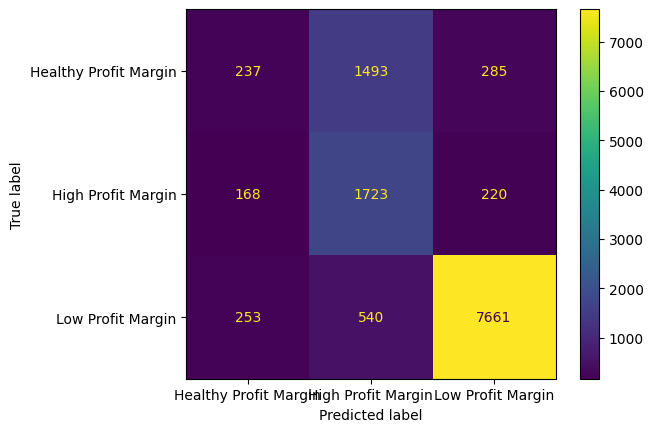

In [ ]:
mlp_prediction = mlp_classifier.predict(X_test)
evaluate_classifier_performance(mlp_classifier, mlp_prediction, X_test, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3589
[LightGBM] [Info] Number of data points in the train set: 50316, number of used features: 17
[LightGBM] [Info] Start training from score -1.814799
[LightGBM] [Info] Start training from score -1.797860
[LightGBM] [Info] Start training from score -0.398277
Hasil Evaluasi:

                       precision    recall  f1-score   support

Healthy Profit Margin       0.67      0.63      0.65      2015
   High Profit Margin       0.80      0.73      0.76      2111
    Low Profit Margin       0.91      0.95      0.93      8454

             accuracy                           0.86     12580
            macro avg       0.80      0.77      0.78     12580
         weighted avg       0.85      0.86      0.86     12580


Accuracy: 0.85866454689

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


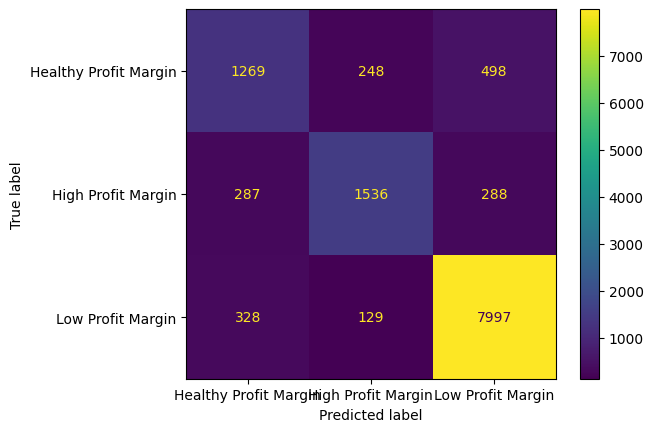

In [ ]:
lgbm_classifier = LGBMClassifier(
    boosting_type='gbdt',
    objective='multiclass',
    is_unbalance=True,
    random_state=42
)
lgbm_classifier.fit(X_train, y_train)

# Predict and evaluate
lgbm_prediction = lgbm_classifier.predict(X_test)
evaluate_classifier_performance(lgbm_classifier, lgbm_prediction, X_test, y_test)

Hasil Evaluasi:

                       precision    recall  f1-score   support

Healthy Profit Margin       0.52      0.53      0.52      2015
   High Profit Margin       0.64      0.64      0.64      2111
    Low Profit Margin       0.89      0.88      0.89      8454

             accuracy                           0.79     12580
            macro avg       0.68      0.69      0.68     12580
         weighted avg       0.79      0.79      0.79     12580


Accuracy: 0.786248012718601
Precision Macro Average: 0.6830708200174153
Precision Micro Average: 0.786248012718601
Recall Macro Average: 0.6859642959404214
Recall Micro Average: 0.786248012718601
F1 Macro Average: 0.6844708867931241
F1 Micro Average: 0.786248012718601

Confusion Matrix



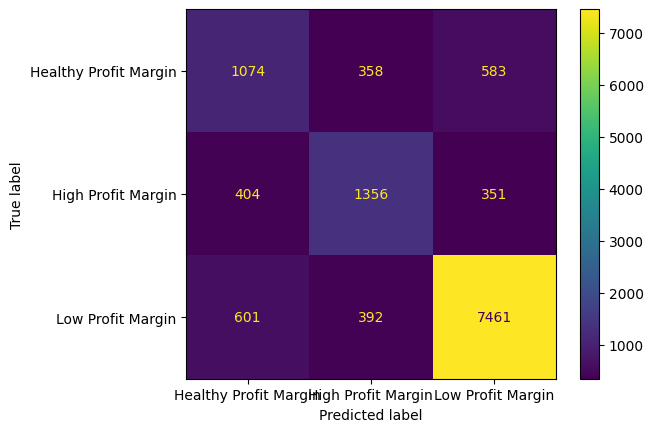

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
dt_prediction = dt_classifier.predict(X_test)
evaluate_classifier_performance(dt_classifier, dt_prediction, X_test, y_test)


## clustering

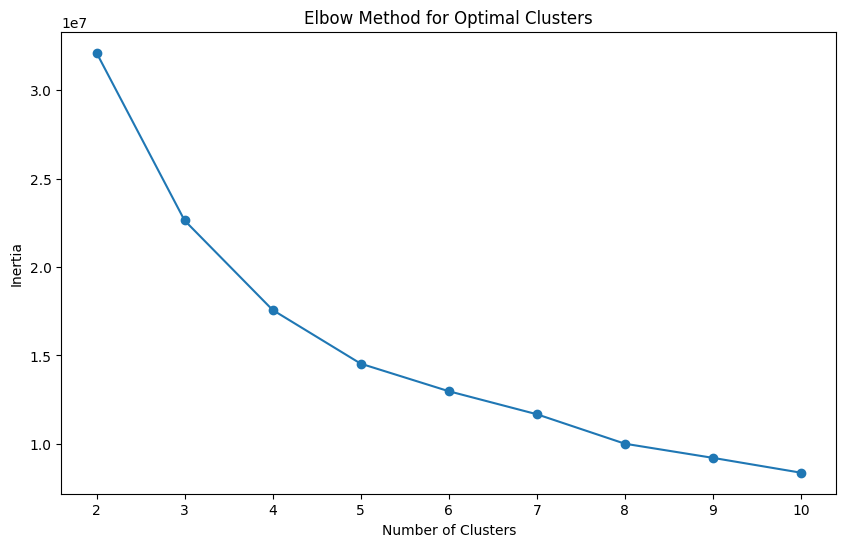

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asumsikan 'train' sudah didefinisikan
X_clustering = train[['cost_of_goods_sold', 'ebitda', 'inventory', 'total_receivables', 'total_assets']]

# K-Means Clustering dengan Elbow Method
inertia = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Terapkan K-Means dengan jumlah cluster optimal (misalnya, k=4 berdasarkan elbow method)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(X_clustering)

In [ ]:
# Evaluasi K-Means Clustering
silhouette_avg_kmeans = silhouette_score(X_clustering, cluster_labels_kmeans)
print(f"K-Means Silhouette Score: {silhouette_avg_kmeans:.4f}")

K-Means Silhouette Score: 0.9012


In [ ]:
# Tambahkan label cluster ke DataFrame
data_clustering = train.copy()  # Inisialisasi DataFrame baru
data_clustering['Cluster'] = cluster_labels_kmeans

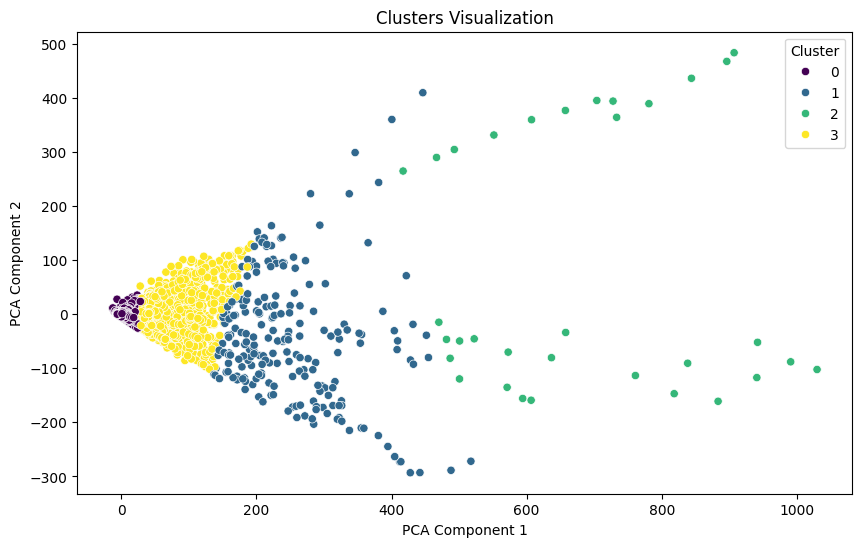

In [ ]:
# PCA untuk visualisasi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_clustering)
data_clustering['PCA1'] = pca_result[:, 0]
data_clustering['PCA2'] = pca_result[:, 1]

# Plot hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='viridis',
    data=data_clustering
)
plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
